# Welcome

This notebook shall answer assignment_1a question 1.

# Table of Contents <a name="toc"></a>

* [Imports](#imports)
* [Question 1: Convergence](#convergence)

# Imports <a name="imports"></a> 
[Back to top](#toc)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tensorflow import keras
from tqdm.keras import TqdmCallback
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
X_train = np.load('data/X_train.npy')
X_test = np.load('data/X_test.npy')
Y_train = np.load('data/Y_train.npy')
Y_test = np.load('data/Y_test.npy')
print("Data loaded")

Data loaded


# Question 1: Convergence  <a name="convergence"></a>
[Back to top](#toc)

<i>Design a feedforward neural network which consists of an input layer, one hidden layer of 10 neurons with ReLU activation function, and an output softmax layer. Assume a learning rate 𝛼 = 0.01, L2 regularization with weight decay parameter 𝛽 = 10−6, and batch size = 32. Use appropriate scaling of input features.

* a) Use the training dataset to train the model and plot accuracies on training and testing data against training epochs.
* b) State the approximate number of epochs where the test error begin to converge.</i>

### Model Parameters

In [3]:
histories = {} 

num_neurons = 10
num_classes = 3

weight_decay_parameter = 10e-6
regularization = keras.regularizers.l2(weight_decay_parameter)

optimizer = 'sgd'
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy', keras.metrics.SparseCategoricalCrossentropy(from_logits=True)]

epochs = 1000
learning_rate = 0.01
batch_size = 32

# callbacks = [TqdmCallback(verbose=1)]
# callbacks = [TqdmCallback(verbose=1), tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)]

print("Model Parameters set")

Model Parameters set


### Create the model

In [6]:
def create_model(num_neurons, num_classes, regularization, optimizer, loss, metrics):
    model = keras.Sequential([
        keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=regularization, bias_regularizer=regularization),
        keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)
    
    print("Model created")
    return model

### Run the model

In [7]:
model = create_model(num_neurons, num_classes, regularization, optimizer, loss, metrics)

callbacks = [TqdmCallback(verbose=1)]
model_name = 'convergence_test_1'

histories[model_name] = model.fit(X_train, Y_train,
                                        epochs=epochs,
                                        verbose = 0,
                                        batch_size=batch_size,
                                        validation_data=(X_test, Y_test),
                                        callbacks=callbacks)

Model created


In [8]:
model = create_model(num_neurons, num_classes, regularization, optimizer, loss, metrics)

callbacks = [TqdmCallback(verbose=1), tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)]
model_name = 'convergence_test_2'

histories[model_name] = model.fit(X_train, Y_train,
                                        epochs=epochs,
                                        verbose = 0,
                                        batch_size=batch_size,
                                        validation_data=(X_test, Y_test),
                                        callbacks=callbacks)

Model created


In [20]:
model = create_model(num_neurons, num_classes, regularization, optimizer, loss, metrics)

callbacks = [TqdmCallback(verbose=1), tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)]
model_name = 'convergence_test_3'

histories[model_name] = model.fit(X_train, Y_train,
                                        epochs=epochs,
                                        verbose = 0,
                                        batch_size=batch_size,
                                        validation_data=(X_test, Y_test),
                                        callbacks=callbacks)

Model created


### Plot the results

In [14]:
def plot_history_object(histories, model_name, history_object):    
    plt.plot(histories[model_name].history[history_object], label='train_'+history_object)
    plt.plot(histories[model_name].history['val_'+history_object], label='val_'+history_object)
    plt.ylabel(history_object)
    plt.xlabel('No. epoch')
    plt.legend(loc="center right")
    plt.show()

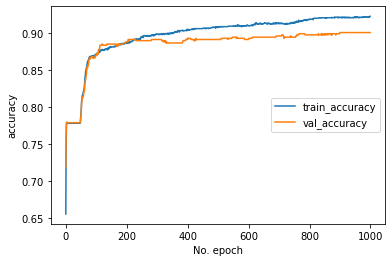

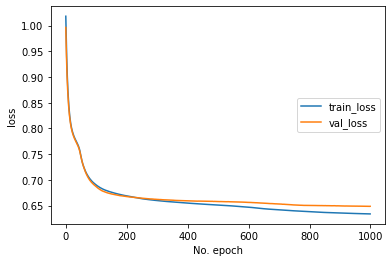

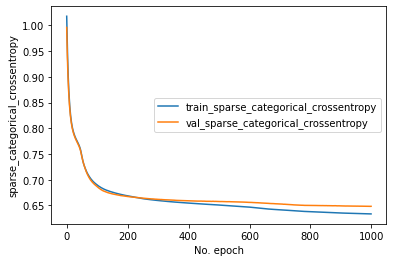

In [15]:
model_name = 'convergence_test_1'
for history_object in ['accuracy', 'loss', 'sparse_categorical_crossentropy']:
    plot_history_object(histories, model_name, history_object)

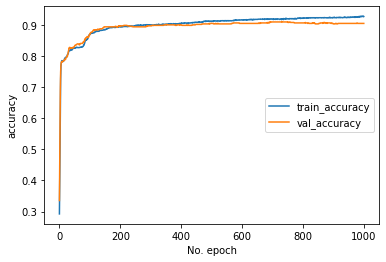

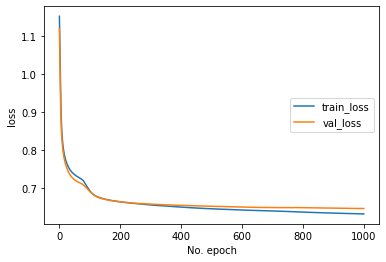

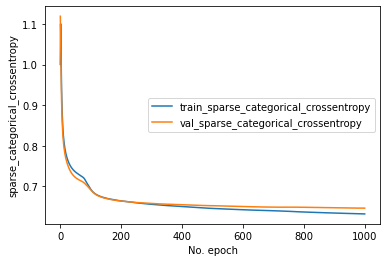

In [16]:
model_name = 'convergence_test_2'
for history_object in ['accuracy', 'loss', 'sparse_categorical_crossentropy']:
    plot_history_object(histories, model_name, history_object)

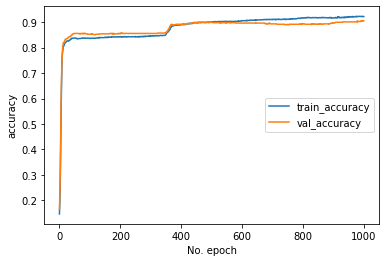

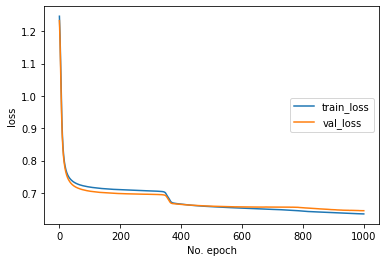

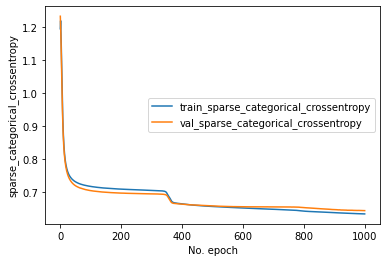

In [21]:
model_name = 'convergence_test_3'
for history_object in ['accuracy', 'loss', 'sparse_categorical_crossentropy']:
    plot_history_object(histories, model_name, history_object)